**Entendendo o GroupBy:**

A função GroupBy() é uma operação fundamental em ciência de dados, frequentemente utilizada em bibliotecas como o pandas em Python. Essa função é usada para dividir os dados em grupos com base em determinadas condições e, em seguida, aplicar alguma operação a cada grupo individualmente.

Aqui estão os principais conceitos relacionados à função GroupBy():

* Divisão (Splitting): A função GroupBy() começa dividindo os dados em grupos com base em uma ou mais colunas. Essas colunas são geralmente aquelas pelas quais você deseja agrupar seus dados.

* Aplicação (Applying): Após a divisão, você pode aplicar várias operações a cada grupo separadamente. Essas operações podem incluir estatísticas descritivas, agregações, transformações ou até mesmo funções personalizadas.

* Combinação (Combining): Depois de aplicar as operações em cada grupo, os resultados são combinados de volta em uma estrutura de dados, como um DataFrame no pandas.

**Esquematicamente:**

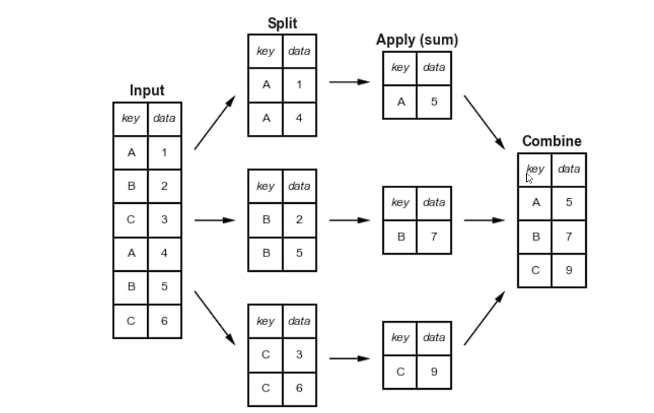

In [1]:
import pandas as pd

df = pd.read_csv("/content/SINASC_RO_2019 V2.csv")

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [2]:
df.shape

(27028, 69)

In [3]:
df = df.drop_duplicates()
df.shape

(27028, 69)

In [4]:
# Verificando as colunas do dataframe

df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [5]:
# Selecionando apenas as colunas que me são pertinentes.

sinasc = df[["DTNASC","ESCMAE", "IDADEMAE"]]
sinasc.head()

,DTNASC,ESCMAE,IDADEMAE
0,2019-02-19,8 a 11 anos,19
1,2019-02-21,8 a 11 anos,29
2,2019-02-25,8 a 11 anos,37
3,2019-03-20,12 anos ou mais,30
4,2019-03-23,8 a 11 anos,30


In [6]:
# Verificando se há valores nulos.

sinasc.isna().sum()

DTNASC        0
ESCMAE      312
IDADEMAE      0
dtype: int64

In [7]:
# Formato do dataframe antes de dropar
# os valores nulos.

sinasc.shape

(27028, 3)

In [8]:
# Verificando o formato do dataframe
# depois de dropar os valores nulos;
# nota-se que houve alteração, portanto
# os valores foram excluidos.

sinasc = sinasc.dropna()
sinasc.shape

(26716, 3)

In [9]:
sinasc.head()

,DTNASC,ESCMAE,IDADEMAE
0,2019-02-19,8 a 11 anos,19
1,2019-02-21,8 a 11 anos,29
2,2019-02-25,8 a 11 anos,37
3,2019-03-20,12 anos ou mais,30
4,2019-03-23,8 a 11 anos,30


In [10]:
# Saber a média de idade das mães:

sinasc.IDADEMAE.mean()

26.075385536757

In [11]:
import numpy as np

# Desvio padrão das idades das mães,
# isto é o quanto as idades variam com
# base na média de idades.

np.std(sinasc.IDADEMAE)

6.3793177121509

In [12]:
# Utilizando a função groupby( ) para agrupar os dados.
# Lembrando a partir da teoria que quando eu chamo a função
# e passo nela a variável que eu quero agrupar com base num
# dataframe, ele a divide, retornando apenas um dataframe,
# como esse, quando realizo uma aplicação, que no caso é
# o mean( ), que calcula a média da idade das mães.

sinasc.groupby("ESCMAE").mean()

<ipython-input-12-44f60a4f8afb>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinasc.groupby("ESCMAE").mean()


,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


In [13]:
sinasc.groupby("DTNASC").count()

,ESCMAE,IDADEMAE
DTNASC,,
2019-01-01,48,48
2019-01-02,66,66
2019-01-03,76,76
2019-01-04,73,73
2019-01-05,70,70
...,...,...
2019-12-27,83,83
2019-12-28,58,58
2019-12-29,48,48


Verificando os dois groupby's percebo que ele forma um dataframe a partir da coluna mencionada, omitindo as ou a anterior que poderia existir antes dela. No primeiro dataframe, apesar de haver a coluna DTNASC ela não existe, ao passo que no segundo ela se faz presente.

In [14]:
# Utilizei a função to_frame( ) para transformar a tabela obtida
# através de sinasc.groupby("DTNASC")["ESCMAE"].count() em um dataframe.

sinasc.groupby("DTNASC")["ESCMAE"].count().to_frame()

,ESCMAE
DTNASC,
2019-01-01,48
2019-01-02,66
2019-01-03,76
2019-01-04,73
2019-01-05,70
...,...
2019-12-27,83
2019-12-28,58
2019-12-29,48


In [15]:
import matplotlib.pyplot as plt


* Pivot_table( ):


A função pivot_table() é uma ferramenta poderosa na área de análise de dados e é frequentemente utilizada em tarefas de data science, especialmente quando se trabalha com conjuntos de dados grandes e complexos. Essa função é comumente encontrada em bibliotecas populares para manipulação e análise de dados em Python, como o pandas.

Aqui estão os principais conceitos relacionados à função pivot_table() e sua importância:

**pivot_table() no Pandas:**

No Pandas, a função pivot_table() é usada para criar uma tabela dinâmica a partir de um DataFrame. Ela permite transformar os dados de uma forma que facilite a análise, resumindo informações e agregando valores com base em critérios específicos.

**Principais Parâmetros:**

* values (obrigatório): Especifica a coluna que contém os valores a serem agregados.

* index (opcional): Especifica as colunas cujos valores serão usados como índices para as linhas na tabela dinâmica.

* columns (opcional): Especifica as colunas cujos valores serão usados como cabeçalhos de coluna na tabela dinâmica.

* aggfunc (opcional): Especifica a função de agregação a ser aplicada aos valores. Pode ser, por exemplo, sum, mean, count, etc.

* fill_value (opcional): Substitui os valores ausentes na tabela dinâmica com o valor especificado.

**Importância:**

Resumo de Dados: A função pivot_table() é fundamental para resumir grandes conjuntos de dados, proporcionando uma visão concisa e estruturada das informações.

Análise Exploratória de Dados (EDA): Facilita a realização de análises exploratórias de dados ao permitir a visualização rápida de estatísticas resumidas e padrões nos dados.

Agregação de Informações: Permite agregar dados de diferentes maneiras, possibilitando a análise de tendências e padrões com base em diferentes critérios.

Relacionamento entre Variáveis: Ajuda a entender o relacionamento entre diferentes variáveis ao organizar e resumir os dados de maneira que as relações se tornem mais claras.

Flexibilidade: Oferece flexibilidade na forma como os dados são apresentados, permitindo uma adaptação fácil a diferentes requisitos de análise

<Axes: xlabel='DTNASC'>

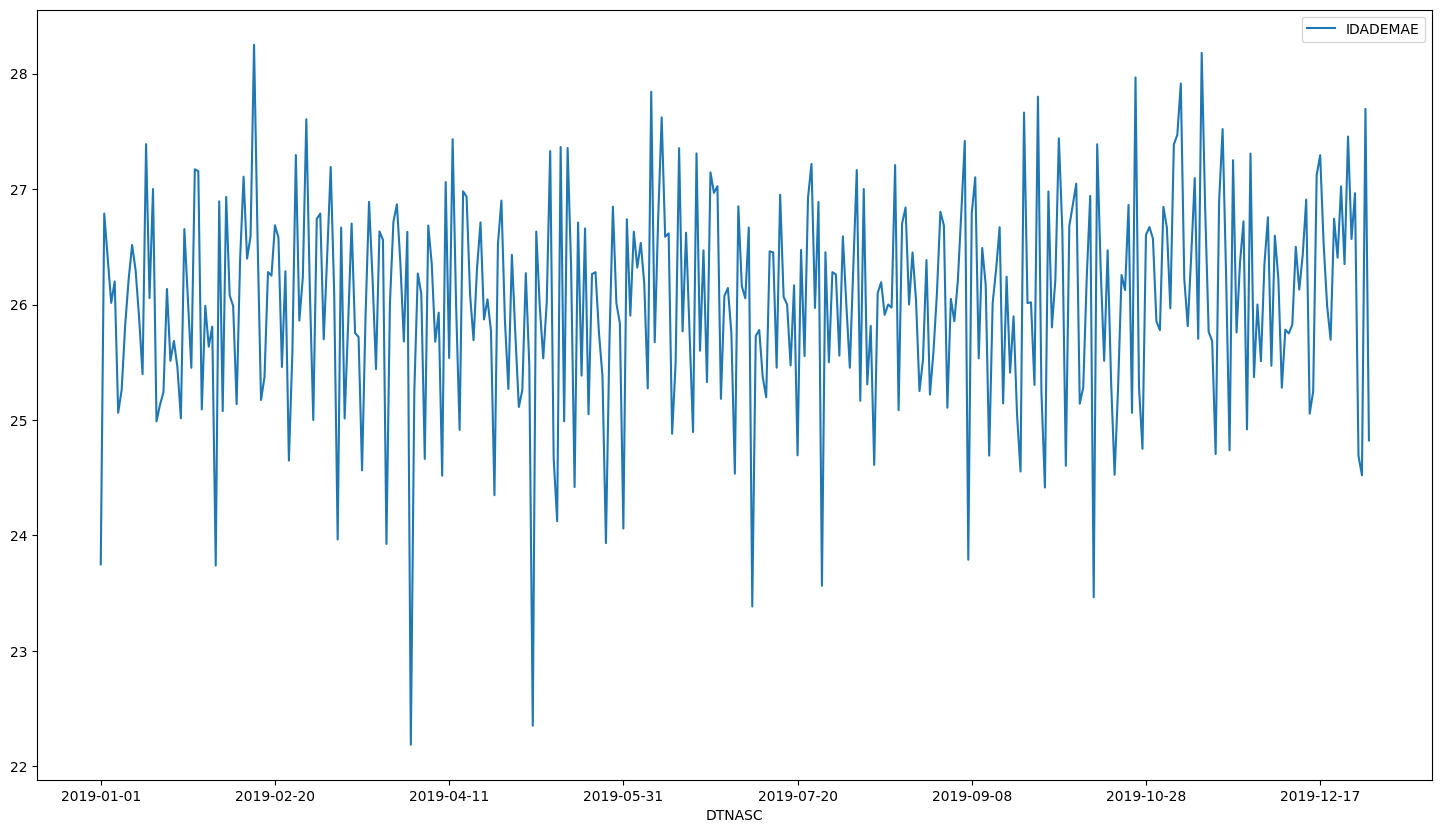

In [16]:
# Utilizando o pivot_table:

sinasc.pivot_table(values="IDADEMAE", index="DTNASC", aggfunc="mean").plot(figsize=[18,10])

# Aula 2:

In [17]:
sinasc_2 = sinasc[["ESCMAE", "IDADEMAE"]]

In [18]:
escolaridade_mae = sinasc_2.groupby("ESCMAE")

In [19]:
# Realizando diversas agregações com aplicações diferentes.

escolaridade_mae.mean().round(2)

,IDADEMAE
ESCMAE,
1 a 3 anos,28.43
12 anos ou mais,29.55
4 a 7 anos,24.60
8 a 11 anos,25.15
Nenhuma,31.58


In [20]:
escolaridade_mae.count()

,IDADEMAE
ESCMAE,
1 a 3 anos,516
12 anos ou mais,5767
4 a 7 anos,4760
8 a 11 anos,15633
Nenhuma,40


In [21]:
escolaridade_mae.sum()

,IDADEMAE
ESCMAE,
1 a 3 anos,14670
12 anos ou mais,170404
4 a 7 anos,117117
8 a 11 anos,393176
Nenhuma,1263


**Realizando agrupamento com a escolaridade da mãe, sua idade e a idade do pai:**

In [22]:
sinasc_3 = df[["ESCMAE", "IDADEMAE", "IDADEPAI"]]

sinasc_3.head()

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0


In [23]:
sinasc_3.isna().sum()

ESCMAE        312
IDADEMAE        0
IDADEPAI    19421
dtype: int64

In [24]:
sinasc_3.shape

(27028, 3)

In [25]:
sinasc_3 = sinasc_3.dropna()

sinasc_3.shape

(7543, 3)

In [26]:
sinasc_3.head()

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0


In [27]:
sinasc_3["DIF"] = sinasc_3["IDADEPAI"] - sinasc_3["IDADEMAE"]
sinasc_3.head()

,ESCMAE,IDADEMAE,IDADEPAI,DIF
0,8 a 11 anos,19,26.0,7.0
1,8 a 11 anos,29,24.0,-5.0
2,8 a 11 anos,37,32.0,-5.0
3,12 anos ou mais,30,24.0,-6.0
4,8 a 11 anos,30,27.0,-3.0


In [28]:
escolaridade_mae = sinasc_3.groupby("ESCMAE")

escolaridade_mae.median()

,IDADEMAE,IDADEPAI,DIF
ESCMAE,,,
1 a 3 anos,29.0,34.0,4.0
12 anos ou mais,30.0,32.0,2.0
4 a 7 anos,26.0,30.0,5.0
8 a 11 anos,25.0,29.0,3.0
Nenhuma,31.5,38.5,3.0


**Tipos de aplicação no groupby:**

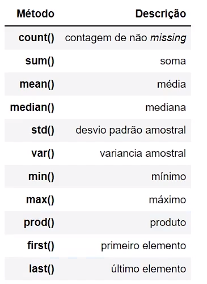

In [29]:
# Outras análises:

# Utilizando o count para aplicação desse groupby, o qual me retornará
# um novo conjunto de dados que posso transformar em dataframe depois.
# Uma característica na função count( ) é que ele conta apenas os dados
# que apresentam algum valor, desconsiderando os que são nulos.

fem = sinasc[df["SEXO"] == "Feminino" ].groupby("DTNASC")["IDADEMAE"].count()
fem.to_frame()

<ipython-input-29-9393a8887b00>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem = sinasc[df["SEXO"] == "Feminino" ].groupby("DTNASC")["IDADEMAE"].count()


,IDADEMAE
DTNASC,
2019-01-01,20
2019-01-02,30
2019-01-03,30
2019-01-04,32
2019-01-05,30
...,...
2019-12-27,37
2019-12-28,30
2019-12-29,20


In [30]:
# Quando eu passo a função count, eu automaticamente elimino os valores nulos,
# isto é, não os conto, sendo por isso que ao conferir se há algum dado nulo
# no dataframe "fem" não há nenhum.

fem.isna().sum()

0

In [31]:
masc = sinasc[df["SEXO"] == "Masculino" ].groupby("DTNASC")["IDADEMAE"].count()
masc.to_frame()

<ipython-input-31-6575514b3246>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  masc = sinasc[df["SEXO"] == "Masculino" ].groupby("DTNASC")["IDADEMAE"].count()


,IDADEMAE
DTNASC,
2019-01-01,28
2019-01-02,36
2019-01-03,46
2019-01-04,41
2019-01-05,40
...,...
2019-12-27,46
2019-12-28,28
2019-12-29,28


Text(0, 0.5, 'quantidade de nascimentos')

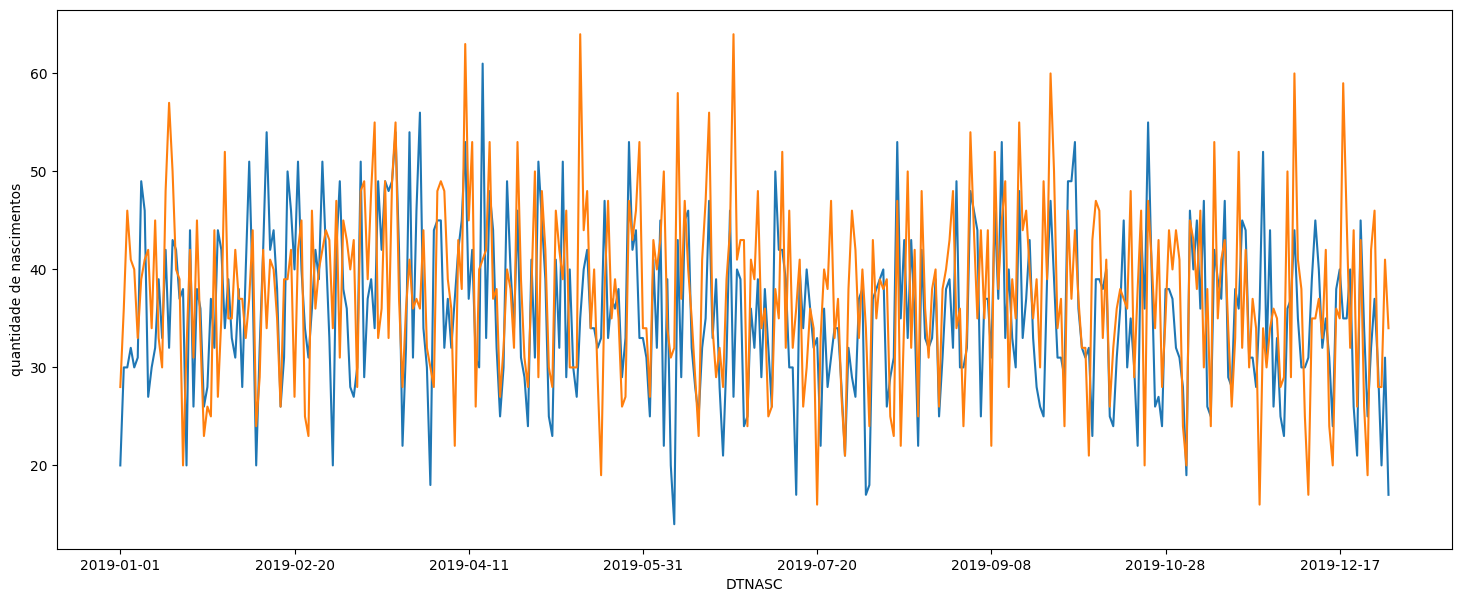

In [32]:
# Gerando um gráfico que mensura a quantidade de nascimento para ambos os sexos:

fem.plot(figsize=[18,7])
masc.plot()
plt.ylabel("quantidade de nascimentos")

In [33]:
# Pode-se, ainda, passar mas de uma chave, que serão os índices do dataframe,
# na função groupby, o que significa dizer que no exemplo acima não precisaríamos
# dividir os sexos em dois grupos diferentes e depois ajuntá-los, vejamos:

sexo_bebes = df.groupby(["DTNASC", "SEXO"])["IDADEMAE"].count().to_frame()
sexo_bebes

IDADEMAE
DTNASC     SEXO               
2019-01-01 Feminino         20
           Masculino        28
2019-01-02 Feminino         31
           Masculino        37
2019-01-03 Feminino         30
...                        ...
2019-12-29 Masculino        28
2019-12-30 Feminino         34
           Masculino        42
2019-12-31 Feminino         17
           Masculino        34

[730 rows x 1 columns]

In [34]:
# O unstack faz com que o segundo índice se transforme em duas colunas.

sexo_bebes = df.groupby(["DTNASC", "SEXO"])["IDADEMAE"].count().unstack()
sexo_bebes

SEXO,Feminino,Masculino
DTNASC,,
2019-01-01,20,28
2019-01-02,31,37
2019-01-03,30,47
2019-01-04,32,41
2019-01-05,30,41
...,...,...
2019-12-27,37,47
2019-12-28,31,28
2019-12-29,20,28


Text(0, 0.5, 'quantidade de nascimentos')

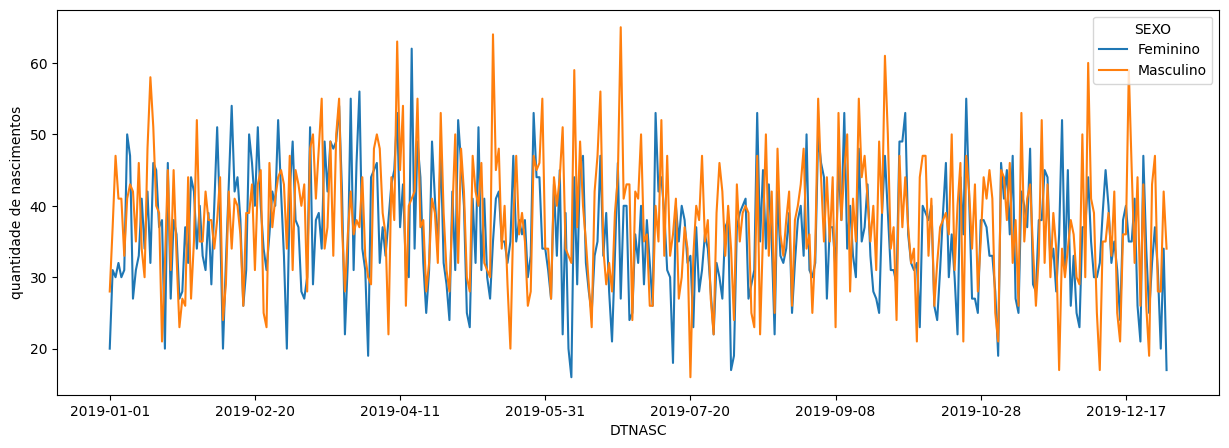

In [35]:
# Realizando o mesmo gráfico sem a necessidade de passar duas varíaveis para
# compô-lo.

sexo_bebes.plot(figsize=[15,5])
plt.ylabel("quantidade de nascimentos")

In [36]:
# Saber o peso médio, em gramas, dos bebês por sexo:

peso_medio_bebes = df.groupby(["DTNASC", "SEXO"])["PESO"].mean().unstack().round(2)
peso_medio_bebes

SEXO,Feminino,Masculino
DTNASC,,
2019-01-01,3280.00,3093.39
2019-01-02,3219.23,3347.03
2019-01-03,3254.07,3231.04
2019-01-04,3096.25,3335.68
2019-01-05,3288.37,3223.90
...,...,...
2019-12-27,3299.59,3218.62
2019-12-28,3204.35,3294.93
2019-12-29,3251.00,3121.04


Text(0, 0.5, 'peso médio dos bebês em gramas')

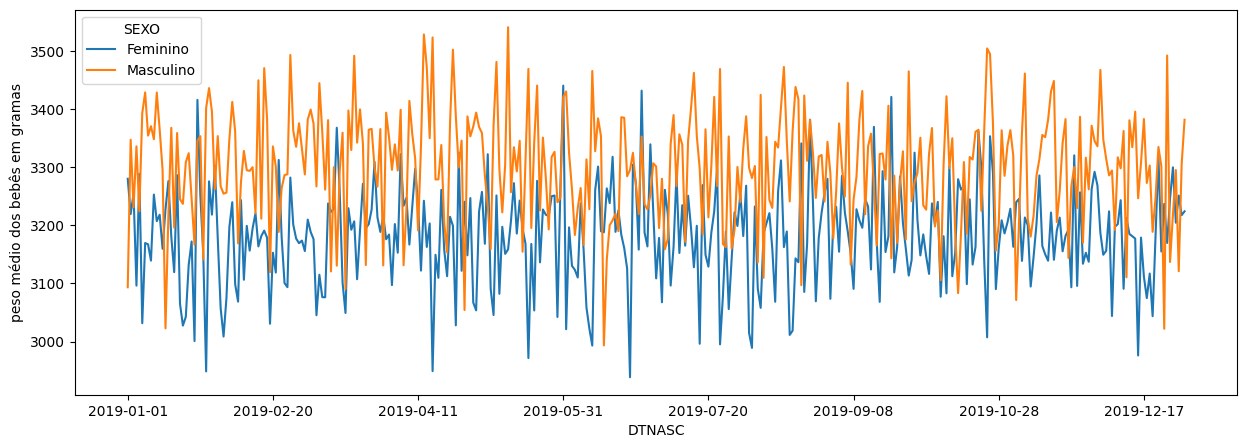

In [37]:
peso_medio_bebes.plot(figsize=[15,5])
plt.ylabel("peso médio dos bebês em gramas")

In [38]:
# Relacionar o peso do bebê com a escolaridade da mãe.

peso_bebe_esc_mae = df.groupby("ESCMAE")["PESO"].median().sort_values()
peso_bebe_esc_mae.to_frame()

,PESO
ESCMAE,
Nenhuma,3120.0
1 a 3 anos,3227.5
4 a 7 anos,3265.0
12 anos ou mais,3275.0
8 a 11 anos,3275.0


Text(0, 0.5, 'peso médio dos bebês em gramas')

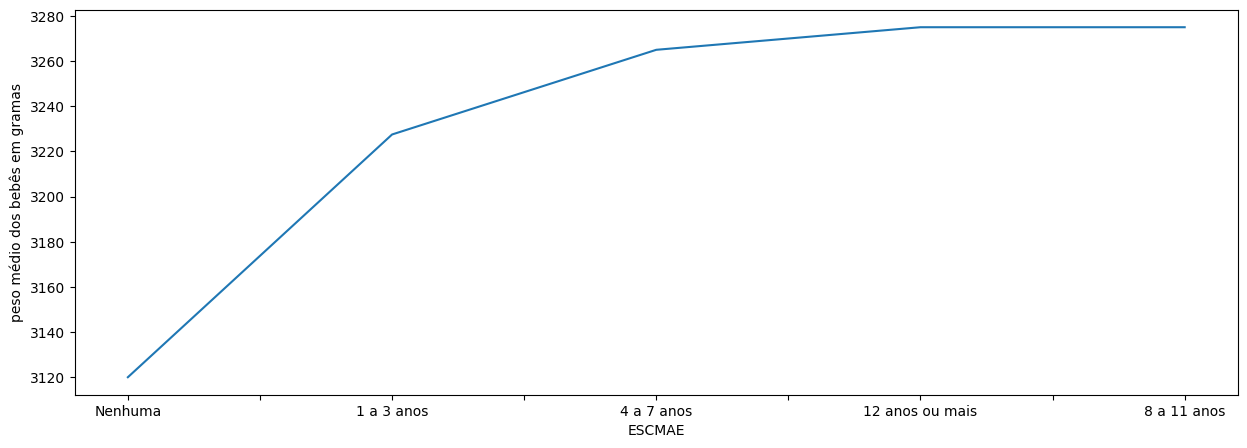

In [39]:
peso_bebe_esc_mae.plot(figsize=[15,5])
plt.ylabel("peso médio dos bebês em gramas")

In [40]:
# Analisando gestação e índice de asfixia:

apgar1 = df.groupby("GESTACAO")["APGAR1"].mean().round(2).sort_values()
apgar1.to_frame()

,APGAR1
GESTACAO,
22 a 27 semanas,5.37
Menos de 22 semanas,5.86
28 a 31 semanas,6.60
32 a 36 semanas,7.82
42 semanas e mais,8.12
37 a 41 semanas,8.19


Text(0.5, 0, 'gestação')

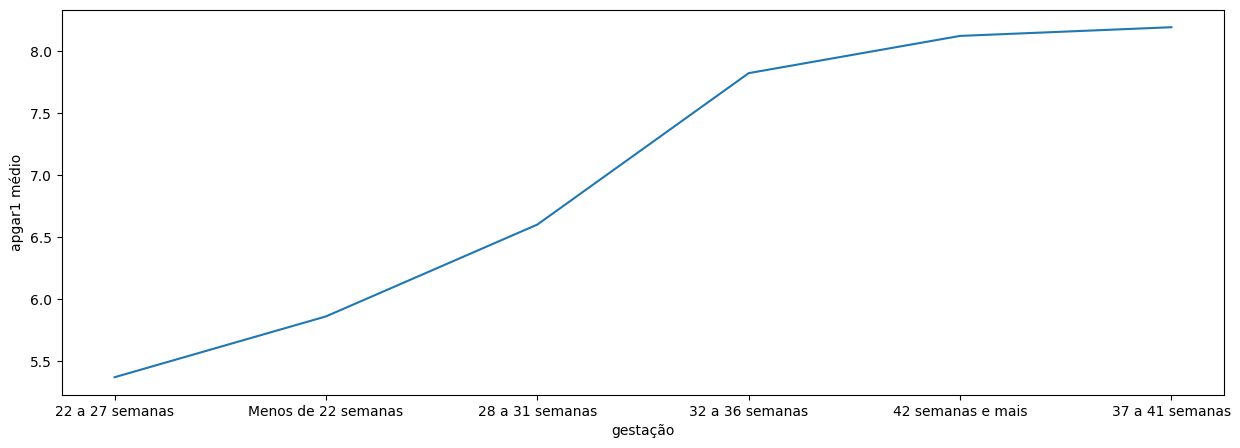

In [41]:
apgar1.plot(figsize=[15,5])
plt.ylabel("apgar1 médio")
plt.xlabel("gestação")

In [42]:
apgar5 = df.groupby("GESTACAO")["APGAR5"].mean().round(2).sort_values()
apgar5.to_frame()

,APGAR5
GESTACAO,
Menos de 22 semanas,6.57
22 a 27 semanas,6.62
28 a 31 semanas,7.99
32 a 36 semanas,8.91
37 a 41 semanas,9.22
42 semanas e mais,9.22


Text(0.5, 0, 'gestação')

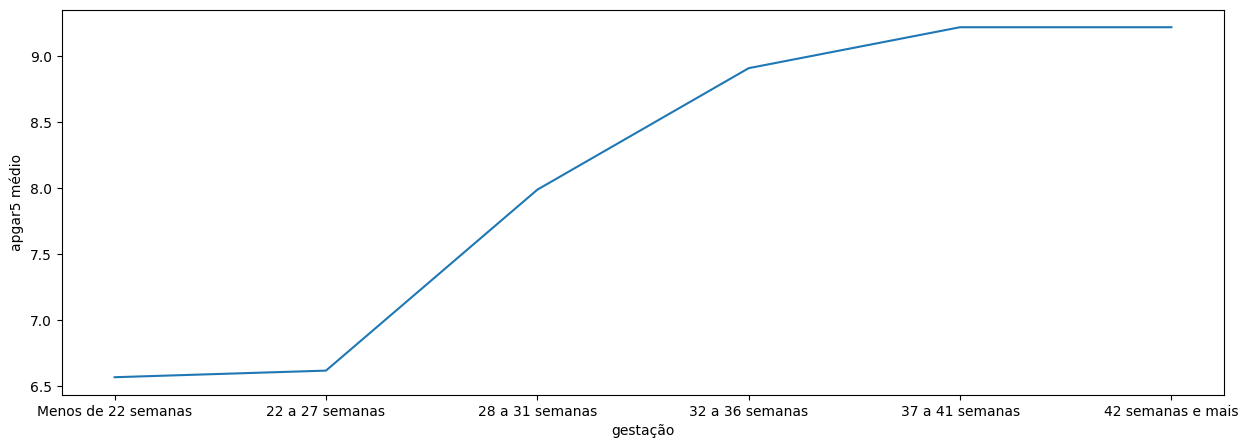

In [43]:
apgar5.plot(figsize=[15,5])
plt.ylabel("apgar5 médio")
plt.xlabel("gestação")

# Método aggregate:

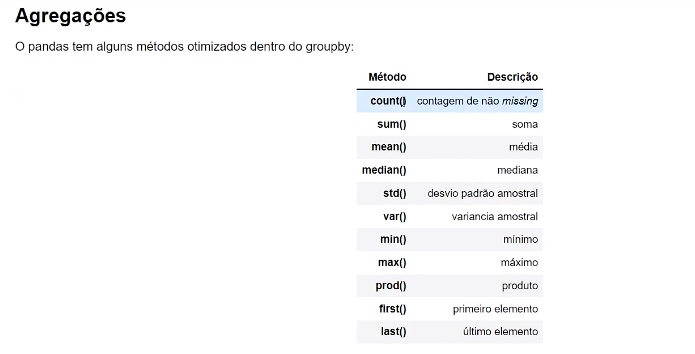

In [44]:
sinasc_2

,ESCMAE,IDADEMAE
0,8 a 11 anos,19
1,8 a 11 anos,29
2,8 a 11 anos,37
3,12 anos ou mais,30
4,8 a 11 anos,30
...,...,...
27023,12 anos ou mais,32
27024,8 a 11 anos,19
27025,8 a 11 anos,24
27026,8 a 11 anos,21


In [45]:
sinasc_4 = sinasc_3.drop("DIF", axis=1)
sinasc_4

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0
...,...,...,...
27021,12 anos ou mais,25,38.0
27022,12 anos ou mais,34,33.0
27023,12 anos ou mais,32,35.0
27025,8 a 11 anos,24,30.0


In [46]:
import numpy as np


In [47]:
# Mas se eu quero utilizar o groupby e criar um dataframe que concebe mais de
# um tipo de aplicação? Ou seja, que eu queria saber além da mediana, por exemplo,
# os valores máximose minímos de uma variável. Para tanto, eu tenho a função
# aggregate, vejamos como ela funciona:

# Lembrando que aggregate e agg são a mesma coisa, sendo a segunda
# apenas uma abreviação da primeira.

sinasc_4.groupby("ESCMAE").aggregate(["min", np.median, max])

IDADEMAE            IDADEPAI             
                     min median max      min median   max
ESCMAE                                                   
1 a 3 anos            12   29.0  44     17.0   34.0  60.0
12 anos ou mais       16   30.0  47     17.0   32.0  65.0
4 a 7 anos            13   26.0  44     16.0   30.0  86.0
8 a 11 anos           13   25.0  53     15.0   29.0  70.0
Nenhuma               26   31.5  40     29.0   38.5  52.0

In [48]:
# Se eu quero saber apenas a idade mínimas dos pais:

sinasc_4.groupby("ESCMAE").aggregate({"IDADEMAE": "min", "IDADEPAI": "min"})

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,12,17.0
12 anos ou mais,16,17.0
4 a 7 anos,13,16.0
8 a 11 anos,13,15.0
Nenhuma,26,29.0


In [49]:
sinasc_4.head()

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0


In [50]:
# Criando uma função que irá receber arrays
# máximos e minímos das idades dos pais, com
# base na escolaridade da mãe.

def amplitude(array):

  return array.max() - array.min()

sinasc_4.groupby("ESCMAE").agg(amplitude)

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,32,43.0
12 anos ou mais,31,48.0
4 a 7 anos,31,70.0
8 a 11 anos,40,55.0
Nenhuma,14,23.0


In [51]:
# Ainda, se eu quero realizar um agrupamento que conceba a média
# o desvio padrão e a amplitude:

agrupamento = sinasc_4.groupby("ESCMAE").agg(["mean", "std", amplitude])
agrupamento

IDADEMAE                       IDADEPAI                    
                      mean       std amplitude       mean       std amplitude
ESCMAE                                                                       
1 a 3 anos       29.055556  6.868768        32  33.805556  9.235020      43.0
12 anos ou mais  29.793454  5.273265        31  32.956214  6.919853      48.0
4 a 7 anos       25.745037  6.869509        31  31.142111  8.717118      70.0
8 a 11 anos      25.717683  6.061556        40  30.028020  7.741795      55.0
Nenhuma          31.833333  5.636193        14  38.500000  8.549854      23.0

In [52]:
# Se eu quiser traduzir as colunas em português:

agrupamento = sinasc_4.groupby("ESCMAE").agg([("media", "mean"), ("desvio padrao", "std"), ("amplitude", amplitude)])
agrupamento

IDADEMAE                           IDADEPAI                \
                     media desvio padrao amplitude      media desvio padrao   
ESCMAE                                                                        
1 a 3 anos       29.055556      6.868768        32  33.805556      9.235020   
12 anos ou mais  29.793454      5.273265        31  32.956214      6.919853   
4 a 7 anos       25.745037      6.869509        31  31.142111      8.717118   
8 a 11 anos      25.717683      6.061556        40  30.028020      7.741795   
Nenhuma          31.833333      5.636193        14  38.500000      8.549854   

                           
                amplitude  
ESCMAE                     
1 a 3 anos           43.0  
12 anos ou mais      48.0  
4 a 7 anos           70.0  
8 a 11 anos          55.0  
Nenhuma              23.0

# Mapeamento os dados:

In [53]:
sinasc_4.head()

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0


In [54]:
# Definindo ESCMAE como índice do dataframe.

sinasc_4 = sinasc_4.set_index("ESCMAE")

mapping = {"Nenhuma": "Nenhuma",
           "8 a 11 anos": "8 anos ou mais",
           "1 a 3 anos": "1 a 7 anos",
           "12 anos ou mais": "8 anos ou mais",
           "4 a 7 anos": "1 a 7 anos"}

# Criando um dataframe que me permite agrupar
# os respectivos dados sobre a escolaridade da mãe
# a partir de um mapeamento criado através do uso
# de um dicionário.

sinasc_4.groupby(mapping).count()


,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 7 anos,1029,1029
8 anos ou mais,6508,6508
Nenhuma,6,6


# Usando o Pivot table:

In [55]:
sinasc5 = df[["ESCMAE", "PESO", "IDADEMAE", "IDADEPAI"]]

sinasc5 = sinasc5.dropna()

sinasc5 = sinasc5.drop_duplicates()

sinasc5.head()

,ESCMAE,PESO,IDADEMAE,IDADEPAI
0,8 a 11 anos,3685,19,26.0
1,8 a 11 anos,3055,29,24.0
2,8 a 11 anos,3460,37,32.0
3,12 anos ou mais,2982,30,24.0
4,8 a 11 anos,3310,30,27.0


In [56]:
mapping = {"Nenhuma": "Nenhuma",
           "8 a 11 anos": "8 anos ou mais",
           "1 a 3 anos": "1 a 7 anos",
           "12 anos ou mais": "8 anos ou mais",
           "4 a 7 anos": "1 a 7 anos"}

sinasc5.ESCMAE = sinasc5.ESCMAE.map(mapping)

sinasc5.head()


,ESCMAE,PESO,IDADEMAE,IDADEPAI
0,8 anos ou mais,3685,19,26.0
1,8 anos ou mais,3055,29,24.0
2,8 anos ou mais,3460,37,32.0
3,8 anos ou mais,2982,30,24.0
4,8 anos ou mais,3310,30,27.0


In [57]:
# Eu posso criar uma tabela, semelhante ao o que faria
# por meio do groupby, com o pivot table. A principal diferença
# dele é que, por meio de seus atributos, eu consigo melhor
# manipular, como no exemplo abaixo, no qual adiciono uma margem
# que mensura o total das duas colunas.

sinasc5.pivot_table(
    values=["IDADEMAE", "IDADEPAI"],
    index="ESCMAE",
    aggfunc="sum")

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 7 anos,26655,32145.0
8 anos ou mais,174102,199328.0
Nenhuma,191,231.0


In [58]:
sinasc5.pivot_table(
    values=["IDADEMAE", "IDADEPAI"],
    index="ESCMAE",
    aggfunc="sum",
    margins=True,
    margins_name="Total"
)

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 7 anos,26655,32145.0
8 anos ou mais,174102,199328.0
Nenhuma,191,231.0
Total,200948,231704.0


In [59]:
# Par eu verificar todas as medidas que os dados
# numéricos podem apresentar, basta eu utilizar a função
# describe():

# Os valores em porcentagem simbolizam os quartis.

sinasc5.describe()

,PESO,IDADEMAE,IDADEPAI
count,7442.000000,7442.000000,7442.000000
mean,3263.804757,27.001881,31.134641
std,486.385870,6.260140,7.793266
min,285.000000,12.000000,15.000000
25%,2995.000000,22.000000,25.000000
50%,3270.000000,27.000000,30.000000
75%,3560.000000,32.000000,36.000000
max,5470.000000,53.000000,86.000000


In [60]:
# Mas uma vez que eu tenha um dataframe e queira
# segmentá-la, isto é, ainda numa mesma coluna
# criar subgrupos, como fazer?

# Eu posso realizar isso por meio do pd.cut(), que apresenta
# essa funcionalidade. Nesse sentido, como o presente
# dataframe se refere à criação de um que aprecie as
# idades dos pais, eu posso, nesse grupo, segmentar as
# idades segundo um variável que estabele um intervalo
# às idades.

idade_mae = pd.cut(sinasc5["IDADEMAE"], [12, 27, 53])
idade_mae.to_frame()

,IDADEMAE
0,"(12, 27]"
1,"(27, 53]"
2,"(27, 53]"
3,"(27, 53]"
4,"(27, 53]"
...,...
27021,"(12, 27]"
27022,"(27, 53]"
27023,"(27, 53]"
27025,"(12, 27]"


In [61]:
idade_mae_qt = pd.cut(sinasc5["IDADEMAE"], [12, 27, 53]).value_counts()
idade_mae_qt.to_frame()

,IDADEMAE
"(12, 27]",4043
"(27, 53]",3398


In [62]:
# Criando um dataframe que relaciona às idades mães
# categorizadas, por assim dizer, com às idades dos pais:

sinasc5.pivot_table(values="IDADEPAI", index=["ESCMAE", idade_mae]).round(2)

IDADEPAI
ESCMAE         IDADEMAE          
1 a 7 anos     (12, 27]     27.82
               (27, 53]     36.56
8 anos ou mais (12, 27]     27.45
               (27, 53]     35.29
Nenhuma        (12, 27]     40.50
               (27, 53]     37.50

In [63]:
# Além do modo que eu realizei acima, separando
# as idades das mães numa espécie de quartis de forma
# manual, o pandas apresenta uma função que realiza a
# discretização dos dados a partir de quartis. Para tanto,
# basta realizar o procedimento a seguir.

# Aqui estou discretizando os dados, dividindo-os em
# três quartis, como podemos ver abaixo.

pd.qcut(sinasc5["IDADEPAI"], 3).to_frame()

,IDADEPAI
0,"(14.999, 27.0]"
1,"(14.999, 27.0]"
2,"(27.0, 34.0]"
3,"(14.999, 27.0]"
4,"(14.999, 27.0]"
...,...
27021,"(34.0, 86.0]"
27022,"(27.0, 34.0]"
27023,"(34.0, 86.0]"
27025,"(27.0, 34.0]"


In [64]:
# Porém, como eu discretizei as idades das mães de modo diferente,
# para que a coluna dos pais seja ressonante com a delas, realizarei
# o processo a seguir, não passando o código da célula acima
# para a criação de um outro dataframe.

idade_pai = pd.cut(sinasc5["IDADEPAI"], [15, 30, 86])
idade_pai.to_frame()

,IDADEPAI
0,"(15, 30]"
1,"(15, 30]"
2,"(30, 86]"
3,"(15, 30]"
4,"(15, 30]"
...,...
27021,"(30, 86]"
27022,"(30, 86]"
27023,"(30, 86]"
27025,"(15, 30]"


In [65]:
idade_pai_qt = pd.cut(sinasc5["IDADEPAI"], [15, 30, 86]).value_counts()
idade_pai_qt.to_frame()

,IDADEPAI
"(15, 30]",3863
"(30, 86]",3578


In [66]:
# Criando o dataframe que me iforme a quantidade
# da idade dos pais, com base na mediana, a partir de
# um intervalo previamente estabelecido, relacionando
# com um intervalo de idades das mães, bem como o seu
# tempo de escolaridade.

sinasc5.pivot_table(values="PESO",
                    index=["ESCMAE", idade_mae],
                    columns=idade_pai,
                    aggfunc="median").round(2)

IDADEPAI                 (15, 30]  (30, 86]
ESCMAE         IDADEMAE                    
1 a 7 anos     (12, 27]    3232.0    3287.5
               (27, 53]    3265.0    3260.0
8 anos ou mais (12, 27]    3250.0    3260.0
               (27, 53]    3305.0    3285.0
Nenhuma        (12, 27]    3020.0    3150.0
               (27, 53]    2905.0    3125.0

In [67]:
sinasc5.pivot_table(values="PESO",
                    index=["ESCMAE", idade_mae],
                    columns=idade_pai,
                    aggfunc=[np.median, "mean"]).round(2)

median              mean         
IDADEPAI                (15, 30] (30, 86] (15, 30] (30, 86]
ESCMAE         IDADEMAE                                    
1 a 7 anos     (12, 27]   3232.0   3287.5  3219.58  3285.64
               (27, 53]   3265.0   3260.0  3242.46  3237.61
8 anos ou mais (12, 27]   3250.0   3260.0  3249.65  3265.45
               (27, 53]   3305.0   3285.0  3294.92  3281.91
Nenhuma        (12, 27]   3020.0   3150.0  3020.00  3150.00
               (27, 53]   2905.0   3125.0  2905.00  3278.33